### Section 7: Day 7 - Beginner - Hangman

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

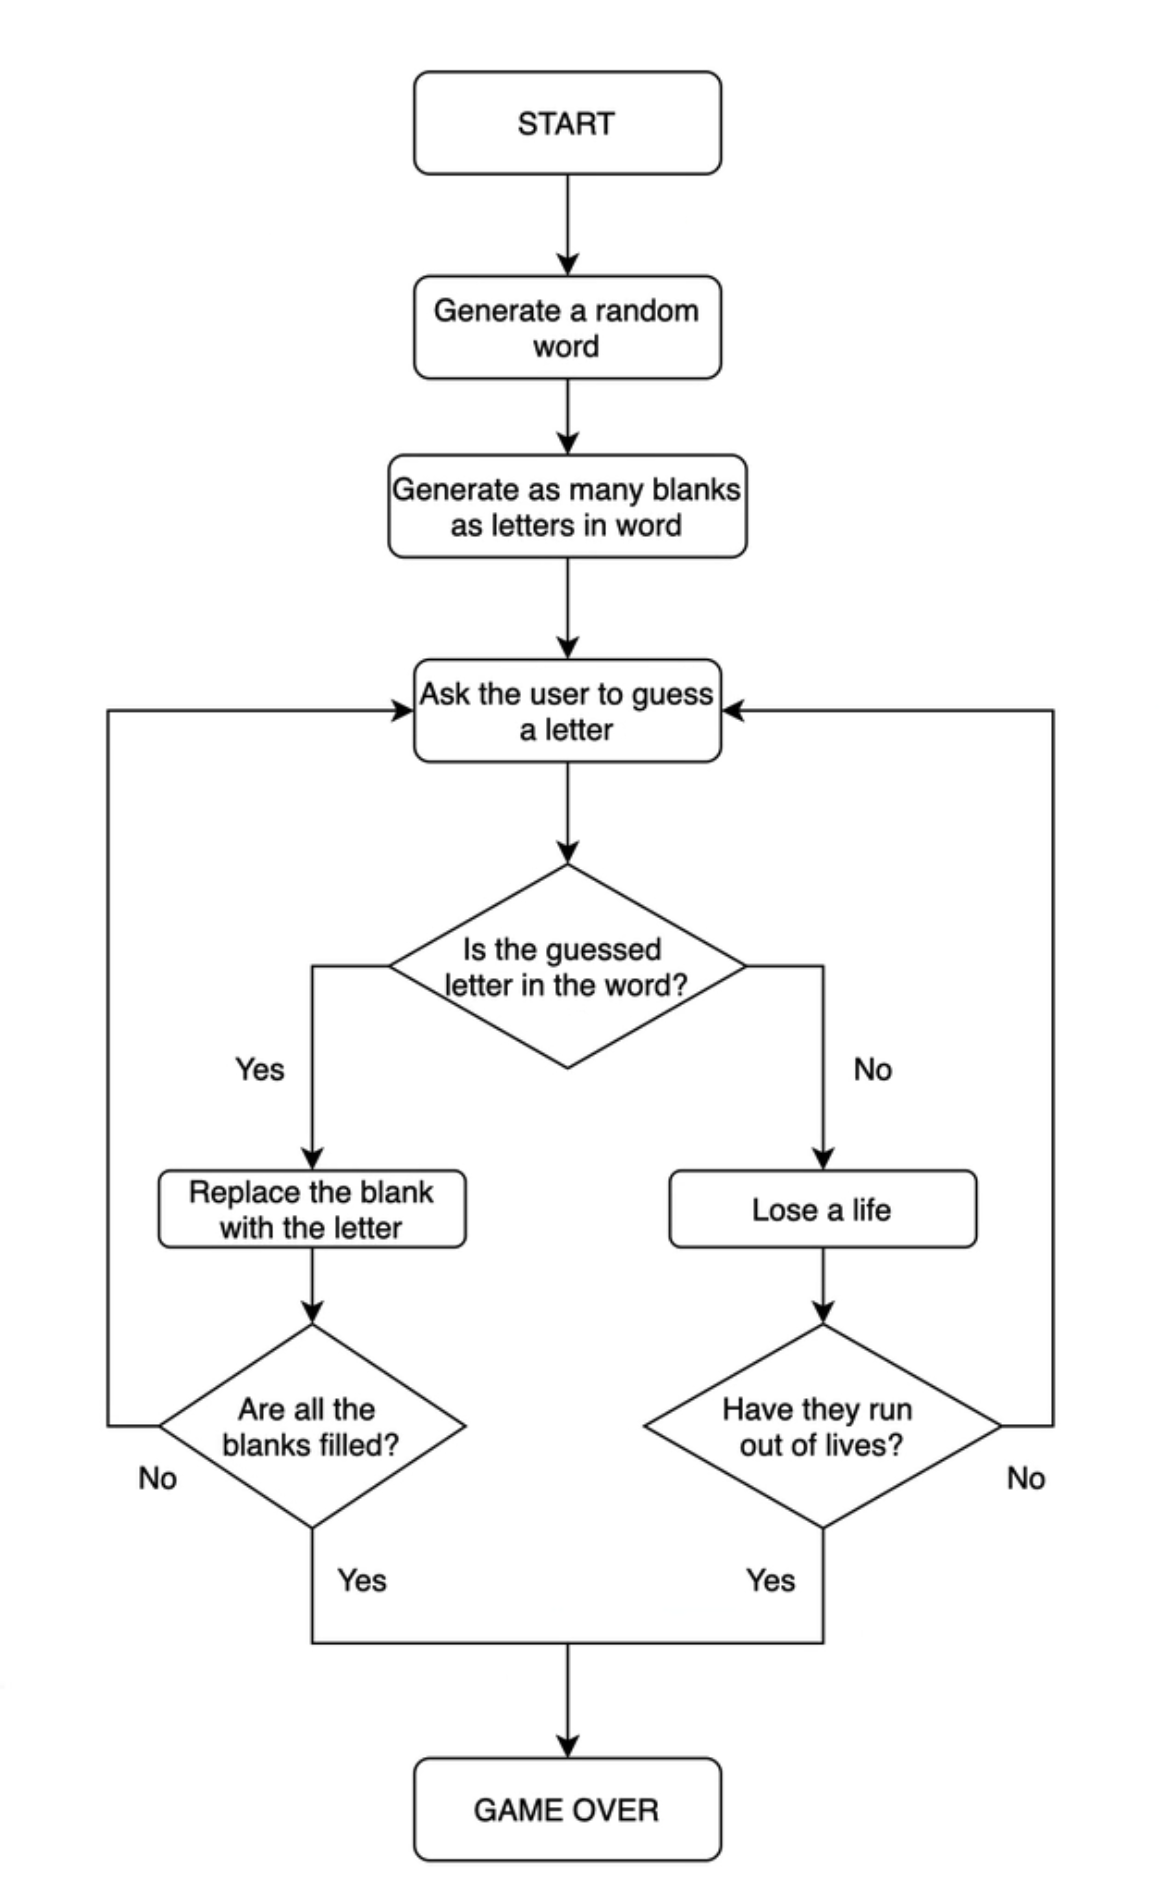

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [3]:
"""Hangman Project, by Benedict Castro benedict.zcastro@gmail.com
A word guessing game.
Tags: short, game, puzzle"""

# Import needed modules
from word_list import word_list
import proj_art
import random

# Set game constraints
MAX_LIVES = len(proj_art.stages)


def main():
    print(proj_art.logo)
    print('''Hangman, a word-guessing game.
    By Benedict Castro benedict.zcastro@gmail.com''')

    def get_random_word():
        """This function outputs a random word from a list of words for the hangman game."""
        secret = random.choice(word_list)
        return secret

    def check_letter(letter_guess, secret_word):
        """This function checks if the letter guessed by the user is part of the secret word."""
        if letter_guess in secret_word:
            return 0, "Yay! The letter is part of the word. "
        else:
            return -1, "Sorry, that letter is not part of the word."

    def modify_word_guess(letter_guess, user_word_guess, secret_word):
        """This function modifies the user's word guess"""
        word_guess_list = list(user_word_guess)
        for j in range(len(word_guess_list)):
            if secret_word[j] == letter_guess:
                word_guess_list[j] = letter_guess
        user_word_guess = ''.join(word_guess_list)
        return user_word_guess

    while True:  # Main game loop
        # This stores the random word that the player needs to guess:
        secret_word = get_random_word()
        secret_word_len = len(secret_word)  # Get the secret word length
        user_word_guess = ''  # Create a variable to store the user's guesses
        for i in range(secret_word_len):  # The variable starts as blank lines
            user_word_guess += "_"

        user_lives = MAX_LIVES
        while user_lives > 1:
            # Keep asking user for letters until they get a valid guess
            letter_guess = input("Please provide a letter: ").lower()
            life_diff, guess_result = check_letter(letter_guess, secret_word)
            if life_diff == 0:  # Modify user's word guess to display correct letters
                user_word_guess = modify_word_guess(letter_guess, user_word_guess, secret_word)
            user_lives += life_diff
            print(guess_result)
            print(proj_art.stages[user_lives-1])
            print(user_word_guess)
            # print(user_lives)

            if user_word_guess == secret_word:
                print("Yahoo! You've guessed the word.")
                break  # The user has guessed the secret word, so the loop needs to be broken.
            if user_lives <= 1:
                print("You ran out of guesses.")
                print(f"The answer was {secret_word}.")

        # Ask user if they want to try again.
        play_again = input('Do you want to play gain? "yes" or "no": ')
        if play_again.lower() == "no":
            break
    print("Thanks for playing!")


# If the program is run (instead of imported), run the game:
if __name__ == "__main__":
    main()


 
 _                                             
| |                                            
| |__   __ _ _ __   __ _ _ __ ___   __ _ _ __  
| '_ \ / _` | '_ \ / _` | '_ ` _ \ / _` | '_ \ 
| | | | (_| | | | | (_| | | | | | | (_| | | | |
|_| |_|\__,_|_| |_|\__, |_| |_| |_|\__,_|_| |_|
                    __/ |                      
                   |___/    
Hangman, a word-guessing game.
    By Benedict Castro benedict.zcastro@gmail.com
Please provide a letter: a
Sorry, that letter is not part of the word.

  +---+
  |   |
  O   |
      |
      |
      |

________
Please provide a letter: e
Yay! The letter is part of the word. 

  +---+
  |   |
  O   |
      |
      |
      |

_______e
Please provide a letter: i
Sorry, that letter is not part of the word.

  +---+
  |   |
  O   |
  |   |
      |
      |

_______e
Please provide a letter: u
Sorry, that letter is not part of the word.

  +---+
  |   |
  O   |
 /|   |
      |
      |
_______e
Please provide a letter: o
Yay! The let

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [ ]:
#Step 5

import random

#TODO-1: - Update the word list to use the 'word_list' from hangman_words.py
#Delete this line: word_list = ["ardvark", "baboon", "camel"]
from hangman_words import word_list

chosen_word = random.choice(word_list)
word_length = len(chosen_word)

end_of_game = False
lives = 6

#TODO-3: - Import the logo from hangman_art.py and print it at the start of the game.
from hangman_art import logo
print(logo)

#Testing code
# print(f'Pssst, the solution is {chosen_word}.')

#Create blanks
display = []
for _ in range(word_length):
    display += "_"

while not end_of_game:
    guess = input("Guess a letter: ").lower()

    #TODO-4: - If the user has entered a letter they've already guessed, print the letter and let them know.
    if guess in display:
        print(f"You've already guessed {guess}")

    #Check guessed letter
    for position in range(word_length):
        letter = chosen_word[position]
        #print(f"Current position: {position}\n Current letter: {letter}\n Guessed letter: {guess}")
        if letter == guess:
            display[position] = letter

    #Check if user is wrong.
    if guess not in chosen_word:
        #TODO-5: - If the letter is not in the chosen_word, print out the letter and let them know it's not in the word.
        print(f"You guessed {guess}, that's not in the word. You lose a life.")
        
        lives -= 1
        if lives == 0:
            end_of_game = True
            print("You lose.")

    #Join all the elements in the list and turn it into a String.
    print(f"{' '.join(display)}")
    #Check if user has got all letters.
    if "_" not in display:
        end_of_game = True
        print("You win.")

    #TODO-2: - Import the stages from hangman_art.py and make this error go away.
    from hangman_art import stages
    print(stages[lives])